In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Load the CSV file using pandas
df = pd.read_csv('/content/drive/MyDrive/btp/Datasets_input/kotak.csv')

# Convert the 'date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])
print(df)
# Reorder the columns with 'Close' at the end

cols = df.columns.tolist()
cols.remove('Close')
cols.append('Close')
df = df[cols]

df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)


# Set the 'date' column as the index
df.set_index('Date', inplace=True)
# print(df.isnull().sum())



# print(df)
# Split the data into training, validation, and testing sets
train_data = df['2000':'2016']
val_data = df['2017':'2018']
test_data = df['2019':]

test_data_original=test_data

# print(train_data)
# Normalize the data
train_mean_original = train_data.mean()
train_std_original = train_data.std()

val_mean_original=val_data.mean()
val_std_original=val_data.std()

test_mean_original=test_data.mean()
test_std_original=test_data.std()

train_data = (train_data - train_mean_original) / train_std_original
val_data=(val_data - val_mean_original) / val_std_original
test_data=(test_data - test_mean_original) / test_std_original

# print(train_data)
# val_data = (val_data - train_mean_original) / train_std_original
# test_data = (test_data - train_mean_original) / train_std_original
# print(test_data_original)
# print(test_data)





           Date         Open         High          Low        Close  \
0    2001-07-02     2.402500     2.475000     2.400000     2.402500   
1    2001-07-03     2.475000     2.475000     2.375000     2.400000   
2    2001-07-04     2.425000     2.450000     2.387500     2.420000   
3    2001-07-05     2.450000     2.472500     2.400000     2.415000   
4    2001-07-06     2.425000     2.425000     2.350000     2.400000   
...         ...          ...          ...          ...          ...   
5434 2023-04-17  1888.949951  1913.800049  1826.099976  1895.150024   
5435 2023-04-18  1900.949951  1904.599976  1885.900024  1888.300049   
5436 2023-04-19  1888.300049  1888.349976  1876.150024  1884.900024   
5437 2023-04-20  1884.300049  1903.400024  1872.050049  1884.000000   
5438 2023-04-21  1882.000000  1903.650024  1877.150024  1893.650024   

        Adj Close      Volume  
0        2.225060    110800.0  
1        2.222745     77520.0  
2        2.241267     49360.0  
3        2.236637  

<ipython-input-47-a6beca387323>:21: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


In [ ]:
class StockPriceDataset(Dataset):
    def __init__(self, data, seq_len):
        self.data = data
        self.seq_len = seq_len

    def __getitem__(self, index):
        # Get a sequence of 7 consecutive rows starting from the index
        seq = self.data[index:index+self.seq_len]

        # Convert the sequence to a PyTorch tensor
        seq_tensor = torch.tensor(seq.values, dtype=torch.float)

        # Return the tensor
        return seq_tensor

    def __len__(self):
        return len(self.data) - self.seq_len + 1

In [ ]:
# class StockPriceDataset(Dataset):
#     def __init__(self, data, seq_len):
#         self.data = data
#         self.seq_len = seq_len

#     def __getitem__(self, index):
#       # Get a sequence of 7 consecutive rows starting from the index
#       seq = self.data[index:index+self.seq_len]

#       # Extract the closing prices from the 4th column
#       closing_prices = seq.iloc[:, 3].values

#       # Convert the closing prices to a PyTorch tensor
#       closing_prices_tensor = torch.tensor(closing_prices, dtype=torch.float)

#       # Return the tensor
#       return closing_prices_tensor


#     def __len__(self):
#         return len(self.data) - self.seq_len + 1

In [ ]:
seq_len = 7
train_dataset = StockPriceDataset(train_data, seq_len=seq_len)
val_dataset = StockPriceDataset(val_data, seq_len=seq_len)
test_dataset = StockPriceDataset(test_data, seq_len=seq_len)
# test_dataset_original=StockPriceDataset(test_data_original,seq_len=seq_len)
predicted_Value=test_data_original['Close'].iloc[-1]+4;
batch_size=64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# import torch.nn as nn

# class StockPriceModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, kernel_size):
#         super(StockPriceModel, self).__init__()

#         # Define the CNN layer
#         self.cnn = nn.Conv1d(6, 32, kernel_size=1, padding=0)

#         # Define the activation function for CNN layer
#         self.cnn_activation = nn.Sigmoid()

#         # Define the MaxPooling layer
#         self.pool = nn.MaxPool1d(kernel_size=1, padding=0)

#         # Define the BiLSTM layer
#         self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)

#         # Define the activation function for BiLSTM layer
#         self.bilstm_activation = nn.Tanh()

#         # Define the Dense layer
#         self.dense = nn.Linear(hidden_size*2, 1)

#     def forward(self, x):
#         # Apply the CNN layer

#         x = x.permute(0, 2, 1)


#         x = self.cnn(x)
#         x = self.cnn_activation(x)

#         # Apply the MaxPooling layer

#         x = self.pool(x)

#         # Reshape the output of the CNN layer
#         batch_size, p, seq_len = x.shape
#         x = x.permute(0, 2, 1)
#         x = x.reshape(batch_size, seq_len, -1)


#         # Apply the BiLSTM layer
#         x, _ = self.bilstm(x)
#         x = self.bilstm_activation(x)


#         # Apply the Dense layer
#         x = self.dense(x[:, -1, :])


#         return x

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch

class StockPriceModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, kernel_size):
        super(StockPriceModel, self).__init__()

        # Define the CNN layer
        self.cnn = nn.Conv1d(6, 32, kernel_size=1, padding=0)

        # Define the activation function for CNN layer
        self.cnn_activation = nn.ReLU()  # ReLU might work better than Sigmoid

        # Define the MaxPooling layer
        self.pool = nn.MaxPool1d(kernel_size=1, padding=0)

        # Define the BiLSTM layer
        self.bilstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True, dropout=0.2)

        # Define the attention mechanism
        self.attention = nn.Linear(hidden_size * 2, 1)

        # Define the Dense layer
        self.dense = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        # Apply the CNN layer
        x = x.permute(0, 2, 1)
        x = self.cnn(x)
        x = self.cnn_activation(x)

        # Apply the MaxPooling layer

        x = self.pool(x)

        # Reshape the output of the CNN layer
        batch_size, p, seq_len = x.shape
        x = x.permute(0, 2, 1)
        x = x.reshape(batch_size, seq_len, -1)

        # Apply the BiLSTM layer
        x, _ = self.bilstm(x)

        # Apply the attention mechanism
        attention_weights = torch.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)  # Weighted sum using attention

        # Apply the Dense layer
        x = self.dense(x)

        return x




In [ ]:
#implementing learing rate schedulers
from torch.optim.lr_scheduler import ReduceLROnPlateau
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = StockPriceModel(input_size=6, hidden_size=128, num_layers=2, kernel_size=1).to(device)
criterion = nn.L1Loss() #mean absolute error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-5)
train_losses=[]
val_losses=[]
num_epochs = 500
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
# Initialize variables to track the index and value of the minimum validation loss and MAE
min_val_loss = float('inf')  # Initialize with a large value
min_val_loss_index = -1
min_val_mae = float('inf')

for epoch in range(num_epochs):
    train_loss = 0.0
    for batch in train_loader:
        # Move the batch to the GPU
        batch = batch.to(device)
        outputs = model(batch)
        targets = batch[:, -1, -1].unsqueeze(1)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch.shape[0]

    # Evaluate the model on the validation set
    val_loss = 0.0
    val_mae = 0.0  # Initialize MAE variable
    with torch.no_grad():
        for batch in val_loader:
            # Move the batch to the GPU
            batch = batch.to(device)

            # Forward pass
            outputs = model(batch)
            targets = batch[:, -1, -1].unsqueeze(1)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * batch.shape[0]

            # Calculate MAE
            mae = torch.abs(outputs - targets).mean().item()
            val_mae += mae * batch.shape[0]

    train_loss /= len(train_data)
    val_loss /= len(val_data)
    val_mae /= len(val_data)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Check for the minimum validation loss and MAE
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        min_val_loss_index = epoch
    if val_mae < min_val_mae:
        min_val_mae = val_mae

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}')

    # Adjust the learning rate
    scheduler.step(val_loss)

print(f"Minimum Validation Loss ({min_val_loss:.4f}) occurred at epoch {min_val_loss_index + 1}")
print(f"Minimum Validation MAE ({min_val_mae:.4f}) occurred at epoch {min_val_loss_index + 1}")


# for epoch in range(num_epochs):
#     train_loss = 0.0
#     for batch in train_loader:
#         # Move the batch to the GPU
#         batch = batch.to(device)
#         outputs = model(batch)
#         targets = batch[:, -1, -1].unsqueeze(1)
#         loss = criterion(outputs, targets)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * batch.shape[0]

#     # Evaluate the model on the validation set
#     val_loss = 0.0
#     with torch.no_grad():
#         for batch in val_loader:
#             # Move the batch to the GPU
#             batch = batch.to(device)

#             # Forward pass
#             outputs = model(batch)
#             targets = batch[:, -1, -1].unsqueeze(1)
#             loss = criterion(outputs, targets)
#             val_loss += loss.item() * batch.shape[0]

#     train_loss /= len(train_data)
#     val_loss /= len(val_data)
#     train_losses.append(train_loss)
#     val_losses.append(val_loss)
#     print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

#     # Adjust the learning rate
#     scheduler.step(val_loss)




Epoch 1, Train Loss: 0.5845, Val Loss: 0.2365, Val MAE: 0.2365
Epoch 2, Train Loss: 0.0688, Val Loss: 0.0995, Val MAE: 0.0995
Epoch 3, Train Loss: 0.0424, Val Loss: 0.0959, Val MAE: 0.0959
Epoch 4, Train Loss: 0.0390, Val Loss: 0.0942, Val MAE: 0.0942
Epoch 5, Train Loss: 0.0369, Val Loss: 0.0934, Val MAE: 0.0934
Epoch 6, Train Loss: 0.0363, Val Loss: 0.0935, Val MAE: 0.0935
Epoch 7, Train Loss: 0.0356, Val Loss: 0.0929, Val MAE: 0.0929
Epoch 8, Train Loss: 0.0359, Val Loss: 0.0945, Val MAE: 0.0945
Epoch 9, Train Loss: 0.0350, Val Loss: 0.0939, Val MAE: 0.0939
Epoch 10, Train Loss: 0.0348, Val Loss: 0.0943, Val MAE: 0.0943
Epoch 11, Train Loss: 0.0352, Val Loss: 0.0932, Val MAE: 0.0932
Epoch 12, Train Loss: 0.0334, Val Loss: 0.0941, Val MAE: 0.0941
Epoch 13, Train Loss: 0.0329, Val Loss: 0.0914, Val MAE: 0.0914
Epoch 14, Train Loss: 0.0326, Val Loss: 0.0898, Val MAE: 0.0898
Epoch 15, Train Loss: 0.0330, Val Loss: 0.0881, Val MAE: 0.0881
Epoch 16, Train Loss: 0.0327, Val Loss: 0.0909, V

In [ ]:

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = StockPriceModel(input_size=6, hidden_size=128, num_layers=2, kernel_size=5).to(device)
# criterion = nn.L1Loss() #mean absolute error
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-7)
# train_losses=[]
# val_losses=[]


# num_epochs = 50
# for epoch in range(num_epochs):
#     train_loss = 0.0
#     for batch in train_loader:
#         # Move the batch to the GPU
#         batch = batch.to(device)
#         outputs = model(batch)
#         targets = batch[:, -1, -1].unsqueeze(1)
#         loss = criterion(outputs, targets)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * batch.shape[0]

#     # Evaluate the model on the validation set
#     val_loss = 0.0
#     with torch.no_grad():
#         for batch in val_loader:
#             # Move the batch to the GPU
#             batch = batch.to(device)

#             # Forward pass
#             # print(batch.shape)
#             outputs = model(batch)
#             targets = batch[:, -1, -1].unsqueeze(1)
#             loss = criterion(outputs, targets)
#             val_loss += loss.item() * batch.shape[0]

#     train_loss /= len(train_data)
#     val_loss /= len(val_data)
#     train_losses.append(train_loss)
#     val_losses.append(val_loss)
#     print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')



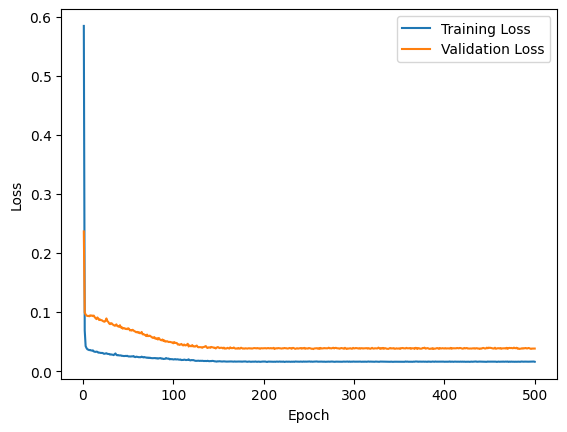

In [ ]:
plt.plot(range(1,num_epochs+1),train_losses,label='Training Loss')
plt.plot(range(1,num_epochs+1),val_losses,label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss = 0
predictions = []
with torch.no_grad():
    model.eval()
    for batch in test_loader:
        # Move the batch to the device
        batch = batch.to(device)

        # Forward pass
        output = model(batch)

        # Calculate the loss
        loss = criterion(output.squeeze(), batch[:, -1, 5])
        test_loss += loss.item() * batch.shape[0]
        # Add the predictions to the list
        predictions += output.squeeze().detach().cpu().numpy().tolist()
        # actual_predictions = [x + (last_observed_price.item()*test_std_original['Close'])+test_mean_original['Close'] for x in predictions]

test_loss /= len(test_data)
print('Test Loss:', test_loss)


Test Loss: 0.06024798304822884


In [ ]:
from sklearn.metrics import r2_score

# Assuming you have the true target values for the test data
true_targets_test = []  # Replace with your actual test target values
# Extract the 'Close' column from the original test dataset
true_targets_test_original = test_data_original['Close'].values

# Normalize the 'Close' column using the same mean and standard deviation
true_targets_test = (true_targets_test_original - test_mean_original['Close']) / test_std_original['Close']

# Convert the true_targets_test to a NumPy array (if not already)
true_targets_test = np.array(true_targets_test)
# Remove the last 6 values from true_targets_test
true_targets_test = true_targets_test[:-6]

predicted_targets_test = []  # Initialize an empty list to store predictions

# Evaluate the model on the test data and collect predictions
test_loss = 0
with torch.no_grad():
    model.eval()
    for batch in test_loader:
        # Move the batch to the device
        batch = batch.to(device)

        # Forward pass
        output = model(batch)

        # Calculate the loss
        loss = criterion(output.squeeze(), batch[:, -1, 5])
        test_loss += loss.item() * batch.shape[0]

        # Append the predictions to the list
        predicted_targets_test.extend(output.squeeze().cpu().tolist())

test_loss /= len(test_data)
print('Test Loss:', test_loss)
print(len(true_targets_test))
print(len(predicted_targets_test))

# Ensure that the lengths of true_targets_test and predicted_targets_test match
if len(true_targets_test) != len(predicted_targets_test):
    # You can either truncate or pad the longer list to make them the same length
    min_length = min(len(true_targets_test), len(predicted_targets_test))
    true_targets_test = true_targets_test[:min_length]
    predicted_targets_test = predicted_targets_test[:min_length]




Test Loss: 0.06024798304822884
1058
1058


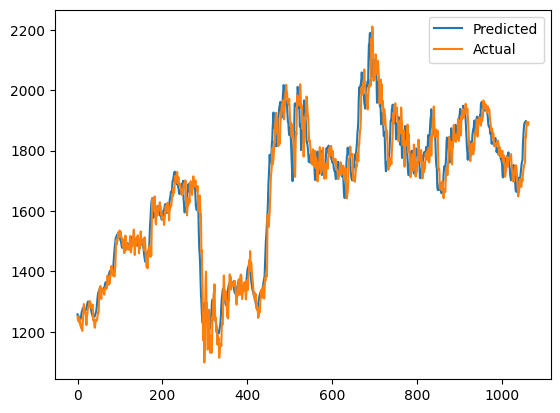

In [ ]:
actual_predictions = [(x * test_std_original['Close']) + test_mean_original['Close'] for x in predictions]
close_prices = test_data_original['Close'].values
plt.plot(actual_predictions, label='Predicted')
plt.plot(close_prices, label='Actual')
plt.legend()
plt.show()

In [ ]:
# take last week data
model.eval()

# Prepare the input sequence for the next day prediction
last_sequence = test_data_original[-seq_len:].values

# Print the input values before normalization
print("Input values before normalization:")

normalized_sequence = (last_sequence - test_mean_original['Close']) / test_std_original['Close']

# Convert the sequence to a PyTorch tensor
sequence_tensor = torch.tensor(normalized_sequence, dtype=torch.float).unsqueeze(0).to(device)

# Forward pass to get the predicted value
with torch.no_grad():
    model_output = model(sequence_tensor)

# Inverse normalize the prediction
predicted_value = (model_output.item() * test_std_original['Close']) + test_mean_original['Close']

print(f"Predicted Close Price for next day {predicted_Value:.4f}")


Input values before normalization:
Predicted Close Price for next day 1897.6500
